In [1]:
%matplotlib inline
%config InlineBack.figure_format = "svg"  # 设置成矢量图，图片显示更清晰
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取原始数据
path = "../data/ex1data1.txt"
# 源文件第一行为数据，没有列名，添加列名
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='Population', ylabel='Profit'>

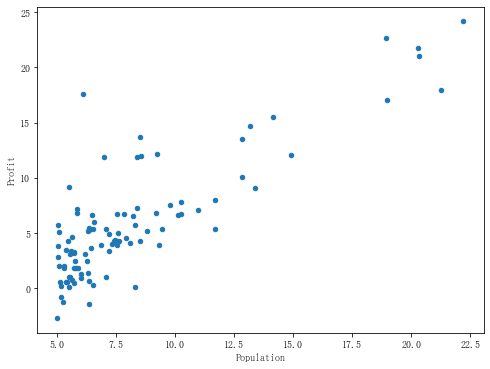

In [3]:
# 绘制数据
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8, 6))

In [4]:
def computerCost(X, y, theta):
    """
    计算代价的函数
    :param X: 输入
    :param y: 输出
    :param theta:参数
    :return: 代价(误差)
    """
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * X.shape[0])

In [5]:
# 在训练集种添加一列，值为1，便于使用向量化的解决方案计算代价和梯度
data.insert(0, "Ones", 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
# 数据整理，输入和输出
cols = data.shape[1]
X = data.iloc[:, :cols - 1]  # 所有行除去最后一列
y = data.iloc[:, cols - 1:]  # 所有行，最后一列

In [7]:
# 代价函数应该是numpy矩阵，将X，y转换
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [8]:
# 查看数据的维度
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [9]:
# 计算代价函数，theta初值0
computerCost(X, y, theta)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    """
    梯度下降函数
    :param X: 输入
    :param y: 输出
    :param theta: 参数
    :param alpha: 学习率
    :param iters: 迭代次数
    :return: 参数，代价
    """
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computerCost(X, y, theta)
    return theta, cost

In [11]:
# 初始化学习率和迭代次数
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [12]:
# 计算代价,当参数为g时
computerCost(X, y, g)

4.515955503078914

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

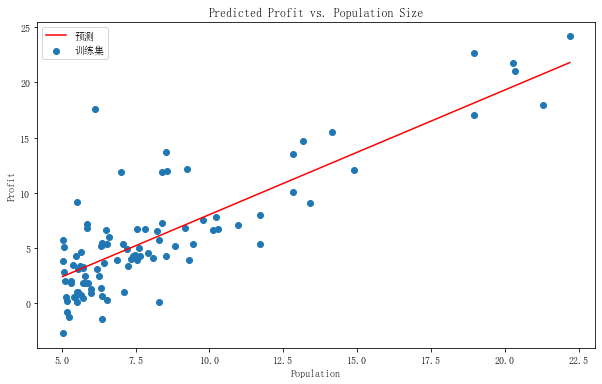

In [13]:
# 绘制线性模型以及数据
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f, "r", label="预测")
ax.scatter(data.Population, data.Profit, label="训练集")
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

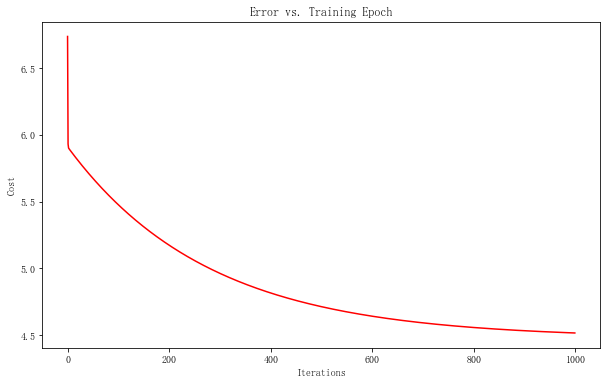

In [14]:
# 由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。
# 注意，代价总是降低——这是凸优化问题的一个例子。
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
